> According to Insight blog: The science of extracting meaning and learning from text data is an active topic of research called Natural Language Processing (NLP).

<b>Also what you see there a few key practical applications come up much more frequently than any other:</b>

- Identifying different cohorts of users/customers (e.g. predicting churn, lifetime value, product preferences)
- Accurately detecting and extracting different categories of feedback (positive and negative reviews/opinions, mentions of particular attributes such as clothing size/fit…)
- Classifying text according to intent (e.g. request for basic help, urgent problem)




### Example data sources
Every Machine Learning problem starts with data, such as a list of emails, posts, or tweets. Common sources of textual information include:

- Product reviews (on Amazon, Yelp, and various App Stores)
- User-generated content (Tweets, Facebook posts, StackOverflow questions)
- Troubleshooting (customer requests, support tickets, chat logs)


# Gather data

## DATASET => "Disasters on Social Media" 
from (Added: September 4, 2015 by Figure Eight | Data Rows: 10877) figure-eight.com
> Contributors looked at over 10,000 tweets culled with a variety of searches like “ablaze”, “quarantine”, and “pandemonium”, then noted whether the tweet referred to a disaster event (as opposed to a joke with the word or a movie review or something non-disastrous).

#### A potential application or Aiming forward
Our task will be to detect which tweets are about a disastrous event as opposed to an irrelevant topic such as a movie. Why? A potential application would be to exclusively notify law enforcement officials about urgent emergencies while ignoring reviews of the most recent Adam Sandler film.


# Clean data
The number one rule we follow is: “Your model will only ever be as good as your data.”


> A clean dataset will allow a model to learn meaningful features and not overfit on irrelevant noise.

### Checklist to remember
Here is a checklist to use to clean your data:

- Remove all irrelevant characters such as any non alphanumeric characters
- Tokenize your text by separating it into individual words
- Remove words that are not relevant, such as “@” twitter mentions or urls
- Convert all characters to lowercase, in order to treat words such as “hello”, “Hello”, and “HELLO” the same
- Consider combining misspelled or alternately spelled words to a single representation (e.g. “cool”/”kewl”/”cooool”)
- Consider lemmatization (reduce words such as “am”, “are”, and “is” to a common form such as “be”)

# Find a good data representation
Machine Learning models take numerical values as input. Models working on images, for example, take in a matrix representing the intensity of each pixel in each color channel.

we first need to find a way to represent it in a way that our algorithm can understand, i.e. as a list of numbers.

As many of us familiar with one hot encoding or label encoding. So here we use
### One-hot encoding (Bag of Words)
A natural way to represent text for computers is to encode each character individually as a number (ASCII for example). If we were to feed this simple representation into a classifier, it would have to learn the structure of words from scratch based only on our data, which is impossible for most datasets. We need to use a higher level approach.

For example, we can build a vocabulary of all the unique words in our dataset, and associate a unique index to each word in the vocabulary. Each sentence is then represented as a list that is as long as the number of distinct words in our vocabulary. At each index in this list, we mark how many times the given word appears in our sentence. This is called a <b>Bag of Words model</b>.




In [1]:
import nltk
import pandas as pd
import numpy as np
import re
import codecs
import keras
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [2]:
import re
re.sub('[^a-zA-z]*#',' ','pakistan is #no#1') #Demo

'pakistan is no 1'

In [3]:
questions = pd.read_csv('socialmedia_relevant_cols.csv',encoding = "ISO-8859-1")
print(questions.head())

X = []
x = np.array(questions['text'])
for word in x:
    X.append(re.sub('[^a-zA-z]*#',' ',word))
    
questions['text'] = X

                                                text choose_one  class_label
0                 Just happened a terrible car crash   Relevant            1
1  Our Deeds are the Reason of this #earthquake M...   Relevant            1
2  Heard about #earthquake is different cities, s...   Relevant            1
3  there is a forest fire at spot pond, geese are...   Relevant            1
4             Forest fire near La Ronge Sask. Canada   Relevant            1


In [4]:
questions.head()

text choose_one  class_label
0                 Just happened a terrible car crash   Relevant            1
1  Our Deeds are the Reason of this earthquake Ma...   Relevant            1
2  Heard about earthquake is different cities, st...   Relevant            1
3  there is a forest fire at spot pond, geese are...   Relevant            1
4             Forest fire near La Ronge Sask. Canada   Relevant            1

In [5]:
questions.tail()

text choose_one  \
10871  M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...   Relevant   
10872  Police investigating after an e-bike collided ...   Relevant   
10873  The Latest: More Homes Razed by Northern Calif...   Relevant   
10874  MEG issues Hazardous Weather Outlook (HWO) htt...   Relevant   
10875   CityofCalgary has activated its Municipal Eme...   Relevant   

       class_label  
10871            1  
10872            1  
10873            1  
10874            1  
10875            1

In [6]:
questions.describe()


class_label
count  10876.000000
mean       0.432604
std        0.498420
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        2.000000

In [7]:
def standardize_text(df, text_field):
    df[text_field] = df[text_field].str.replace(r"http\S+", "")
    df[text_field] = df[text_field].str.replace(r"http", "")
    df[text_field] = df[text_field].str.replace(r"@\S+", "")
    df[text_field] = df[text_field].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ")
    df[text_field] = df[text_field].str.replace(r"@", "at")
    df[text_field] = df[text_field].str.lower()
    return df

questions = standardize_text(questions, "text")

questions.to_csv("clean_data.csv")
questions.head()

text choose_one  class_label
0                 just happened a terrible car crash   Relevant            1
1  our deeds are the reason of this earthquake ma...   Relevant            1
2  heard about earthquake is different cities, st...   Relevant            1
3  there is a forest fire at spot pond, geese are...   Relevant            1
4             forest fire near la ronge sask  canada   Relevant            1

In [8]:
clean_questions = pd.read_csv("clean_data.csv")
clean_questions.tail()

Unnamed: 0                                               text  \
10871       10871        m1 94  01 04 utc ?5km s of volcano hawaii     
10872       10872  police investigating after an e bike collided ...   
10873       10873  the latest  more homes razed by northern calif...   
10874       10874        meg issues hazardous weather outlook (hwo)    
10875       10875   cityofcalgary has activated its municipal eme...   

      choose_one  class_label  
10871   Relevant            1  
10872   Relevant            1  
10873   Relevant            1  
10874   Relevant            1  
10875   Relevant            1

> ### Data Overview


In [9]:
clean_questions.groupby("class_label").count()

Unnamed: 0  text  choose_one
class_label                              
0                  6187  6187        6187
1                  4673  4673        4673
2                    16    16          16

> ### Our data is clean, now it needs to be prepared
Now that our inputs are more reasonable, let's transform our inputs in a way our model can understand. This implies:

- Tokenizing sentences to a list of separate words
- Creating a train test split
- Inspecting our data a little more to validate results

In [10]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

clean_questions["tokens"] = clean_questions["text"].apply(tokenizer.tokenize)
clean_questions.head()

Unnamed: 0                                               text choose_one  \
0           0                 just happened a terrible car crash   Relevant   
1           1  our deeds are the reason of this earthquake ma...   Relevant   
2           2  heard about earthquake is different cities, st...   Relevant   
3           3  there is a forest fire at spot pond, geese are...   Relevant   
4           4             forest fire near la ronge sask  canada   Relevant   

   class_label                                             tokens  
0            1          [just, happened, a, terrible, car, crash]  
1            1  [our, deeds, are, the, reason, of, this, earth...  
2            1  [heard, about, earthquake, is, different, citi...  
3            1  [there, is, a, forest, fire, at, spot, pond, g...  
4            1      [forest, fire, near, la, ronge, sask, canada]

> ### More about dataset

In [11]:

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

all_words = [word for tokens in clean_questions["tokens"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in clean_questions["tokens"]]
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

154619 words total, with a vocabulary size of 18086
Max sentence length is 34


On to the Machine Learning
Now that our data is clean and prepared, let's dive in to the machine learning part

> ### Bag of Words Counts¶


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def cv(data):
    count_vectorizer = CountVectorizer()
    emb = count_vectorizer.fit_transform(data)
    return emb, count_vectorizer

list_corpus = clean_questions["text"].tolist()
list_labels = clean_questions["class_label"].tolist()

X_train, X_test, y_train, y_test = train_test_split(list_corpus, list_labels, test_size=0.2, 
                                                                                random_state=40)
print(X_train[0:10])
X_train_counts, count_vectorizer = cv(X_train)
X_test_counts = count_vectorizer.transform(X_test)

["    'my friend came to school blasted   i asked him if he was high he said pancakes then collapsed'  iowa city high   ", 'dtn india  rly tragedy in mp  some live to recount horror     when i saw coaches of my train plunging into water    ', "   and  can't survive without referring    without mr modi they are big zeros", "three days off from work and they've pretty much all been wrecked hahaha shoutout to my family for that one", 'malaysian officials say debris found on reunion island is from mh370   reports  ', " so be it  you can't tell an oppressed group of people how to react to trauma  that would be stupid and ignorant ", 'annihilated abs   ?? ', 'america like south africa is a traumatised sick country   in different ways of course   but still messed up ', "get emergency edmonton locksmith services  in edmonton canada business name  'i got locked out'  locksmith edmonton", '3 things all affiliate marketers need to survive online   every affiliate marketer is always    ']


> ### Visualizing the embeddings
Now that we've created embeddings, let's visualize them and see if we can identify some structure. In a perfect world, our embeddings would be so distinct that are two classes would be perfectly separated. Since visualizing data in 20k dimensions is hard, let's project it down to 2.

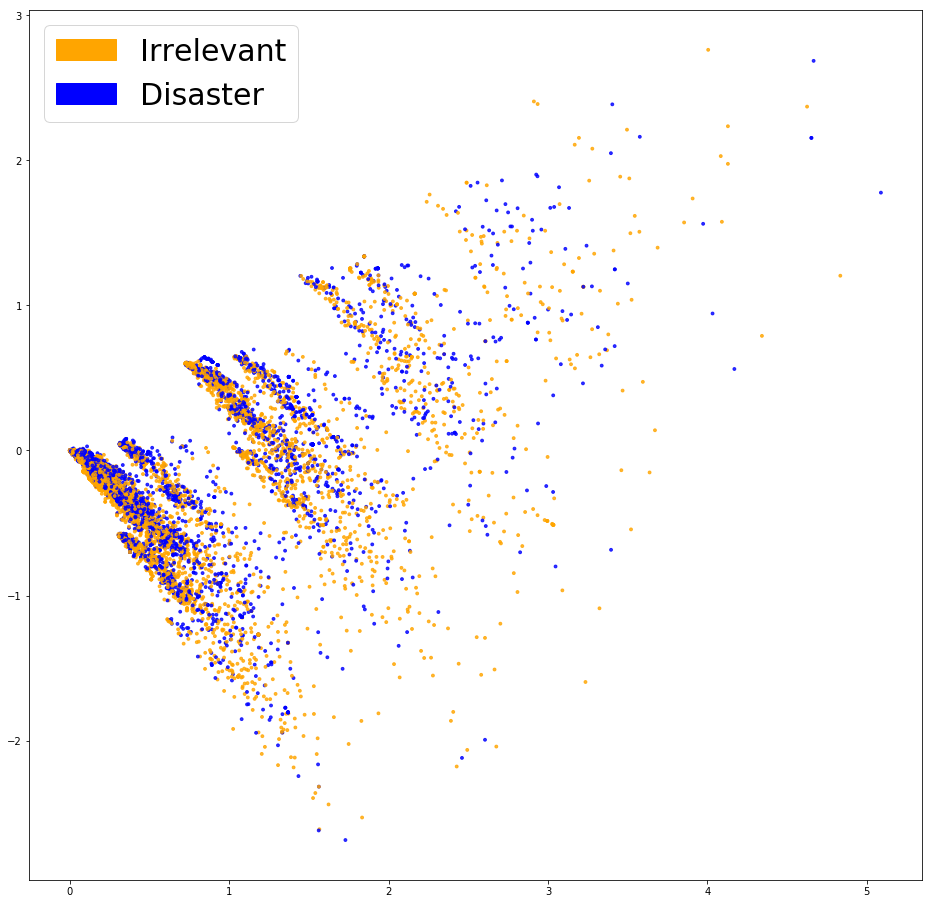

In [13]:
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib
import matplotlib.patches as mpatches


def plot_LSA(test_data, test_labels, savepath="PCA_demo.csv", plot=True):
        lsa = TruncatedSVD(n_components=2)
        lsa.fit(test_data)
        lsa_scores = lsa.transform(test_data)
        color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
        color_column = [color_mapper[label] for label in test_labels]
        colors = ['orange','blue','blue']
        if plot:
            plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8, c=test_labels, cmap=matplotlib.colors.ListedColormap(colors))
            red_patch = mpatches.Patch(color='orange', label='Irrelevant')
            green_patch = mpatches.Patch(color='blue', label='Disaster')
            plt.legend(handles=[red_patch, green_patch], prop={'size': 30})


fig = plt.figure(figsize=(16, 16))          
plot_LSA(X_train_counts, y_train)
plt.show()

> These embeddings don't look very cleanly separated. Let's see if we can still fit a useful model on them.

Needs more workings on it. may be Stemming.

> ### Fitting a classifier
Starting with a logistic regression is a good idea. It is simple, often gets the job done, and is easy to interpret.

In [14]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg', 
                         multi_class='multinomial', n_jobs=-1, random_state=40)
clf.fit(X_train_counts, y_train)

y_predicted_counts = clf.predict(X_test_counts)

> ### *Evaluation
Let's start by looking at some metrics to see if our classifier performed well at all.

In [15]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

def get_metrics(y_test, y_predicted):  
    # true positives / (true positives+false positives)
    precision = precision_score(y_test, y_predicted, pos_label=None,
                                    average='weighted')             
    # true positives / (true positives + false negatives)
    recall = recall_score(y_test, y_predicted, pos_label=None,
                              average='weighted')
    
    # harmonic mean of precision and recall
    f1 = f1_score(y_test, y_predicted, pos_label=None, average='weighted')
    
    # true positives + true negatives/ total
    accuracy = accuracy_score(y_test, y_predicted)
    return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = get_metrics(y_test, y_predicted_counts)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.753, precision = 0.751, recall = 0.753, f1 = 0.752


> ### Inspection
A metric is one thing, but in order to make an actionnable decision, we need to actually inspect the kind of mistakes our classifier is making. Let's start by looking at the confusion matrix.

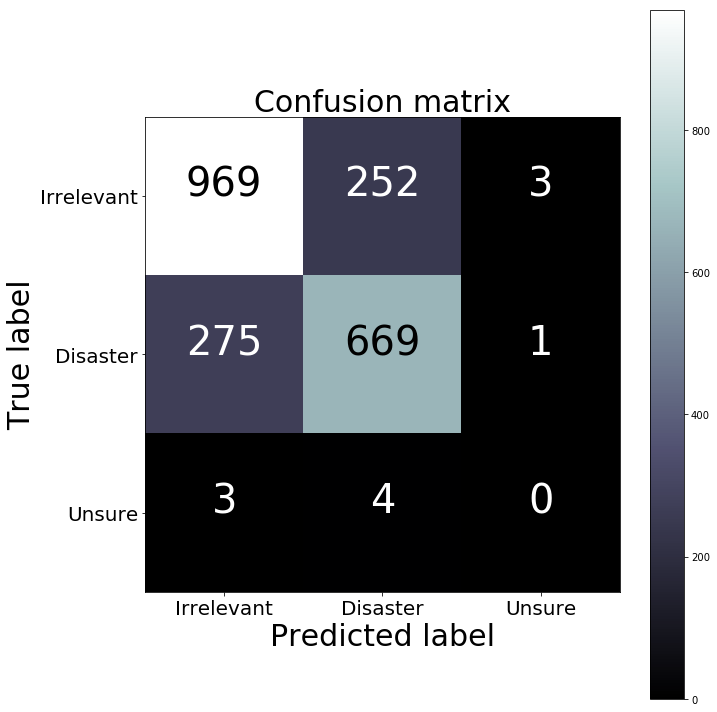

[[969 252   3]
 [275 669   1]
 [  3   4   0]]


In [16]:
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.bone):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=20)
    plt.yticks(tick_marks, classes, fontsize=20)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", 
                 color="white" if cm[i, j] < thresh else "black", fontsize=40)
    
    plt.tight_layout()
    plt.ylabel('True label', fontsize=30)
    plt.xlabel('Predicted label', fontsize=30)

    return plt



cm = confusion_matrix(y_test, y_predicted_counts)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['Irrelevant','Disaster','Unsure'], normalize=False, title='Confusion matrix')
plt.show()
print(cm)

> Our classifier creates more false negatives than false positives (proportionally). In other words, our model’s most common error is inaccurately classifying disasters as irrelevant. If false positives represent a high cost for law enforcement, this could be a good bias for our classifier to have.

> ### Further inspection
Let's look at the features our classifier is using to make decisions.

In [17]:
def get_most_important_features(vectorizer, model, n=5):
    index_to_word = {v:k for k,v in vectorizer.vocabulary_.items()}
    
    # loop for each class
    classes ={}
    for class_index in range(model.coef_.shape[0]):
        word_importances = [(el, index_to_word[i]) for i,el in enumerate(model.coef_[class_index])]
        sorted_coeff = sorted(word_importances, key = lambda x : x[0], reverse=True)
        tops = sorted(sorted_coeff[:n], key = lambda x : x[0])
        bottom = sorted_coeff[-n:]
        classes[class_index] = {
            'tops':tops,
            'bottom':bottom
        }
    return classes

importance = get_most_important_features(count_vectorizer, clf, 10)

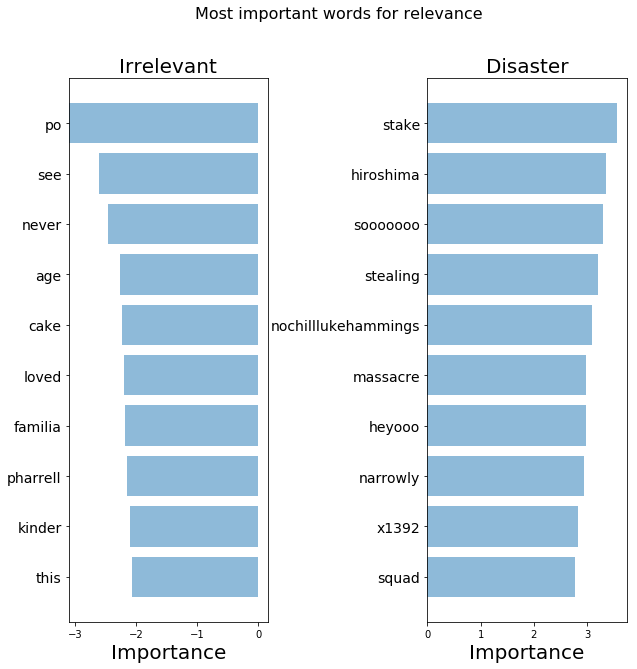

In [18]:
def plot_important_words(top_scores, top_words, bottom_scores, bottom_words, name):
    y_pos = np.arange(len(top_words))
    top_pairs = [(a,b) for a,b in zip(top_words, top_scores)]
    top_pairs = sorted(top_pairs, key=lambda x: x[1])
    
    bottom_pairs = [(a,b) for a,b in zip(bottom_words, bottom_scores)]
    bottom_pairs = sorted(bottom_pairs, key=lambda x: x[1], reverse=True)
    
    top_words = [a[0] for a in top_pairs]
    top_scores = [a[1] for a in top_pairs]
    
    bottom_words = [a[0] for a in bottom_pairs]
    bottom_scores = [a[1] for a in bottom_pairs]
    
    fig = plt.figure(figsize=(10, 10))  

    plt.subplot(121)
    plt.barh(y_pos,bottom_scores, align='center', alpha=0.5)
    plt.title('Irrelevant', fontsize=20)
    plt.yticks(y_pos, bottom_words, fontsize=14)
    plt.suptitle('Key words', fontsize=16)
    plt.xlabel('Importance', fontsize=20)
    
    plt.subplot(122)
    plt.barh(y_pos,top_scores, align='center', alpha=0.5)
    plt.title('Disaster', fontsize=20)
    plt.yticks(y_pos, top_words, fontsize=14)
    plt.suptitle(name, fontsize=16)
    plt.xlabel('Importance', fontsize=20)
    
    plt.subplots_adjust(wspace=0.8)
    plt.show()

top_scores = [a[0] for a in importance[1]['tops']]
top_words = [a[1] for a in importance[1]['tops']]
bottom_scores = [a[0] for a in importance[1]['bottom']]
bottom_words = [a[1] for a in importance[1]['bottom']]

plot_important_words(top_scores, top_words, bottom_scores, bottom_words, "Most important words for relevance")


hey! Our classifier correctly picks up on some patterns (hiroshima, massacre), but clearly seems to be overfitting on some irellevant terms (heyoo, x1392)

> ### TFIDF Bag of Words
Let's try a slightly more subtle approach. On top of our bag of words model, we use a TF-IDF (Term Frequency, Inverse Document Frequency) which means weighing words by how frequent they are in our dataset, discounting words that are too frequent, as they just add to the noise.

In [19]:
def tfidf(data):
    tfidf_vectorizer = TfidfVectorizer()

    train = tfidf_vectorizer.fit_transform(data)

    return train, tfidf_vectorizer

X_train_tfidf, tfidf_vectorizer = tfidf(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

C:\Users\Hammad Zahid\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\feature_extraction\text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


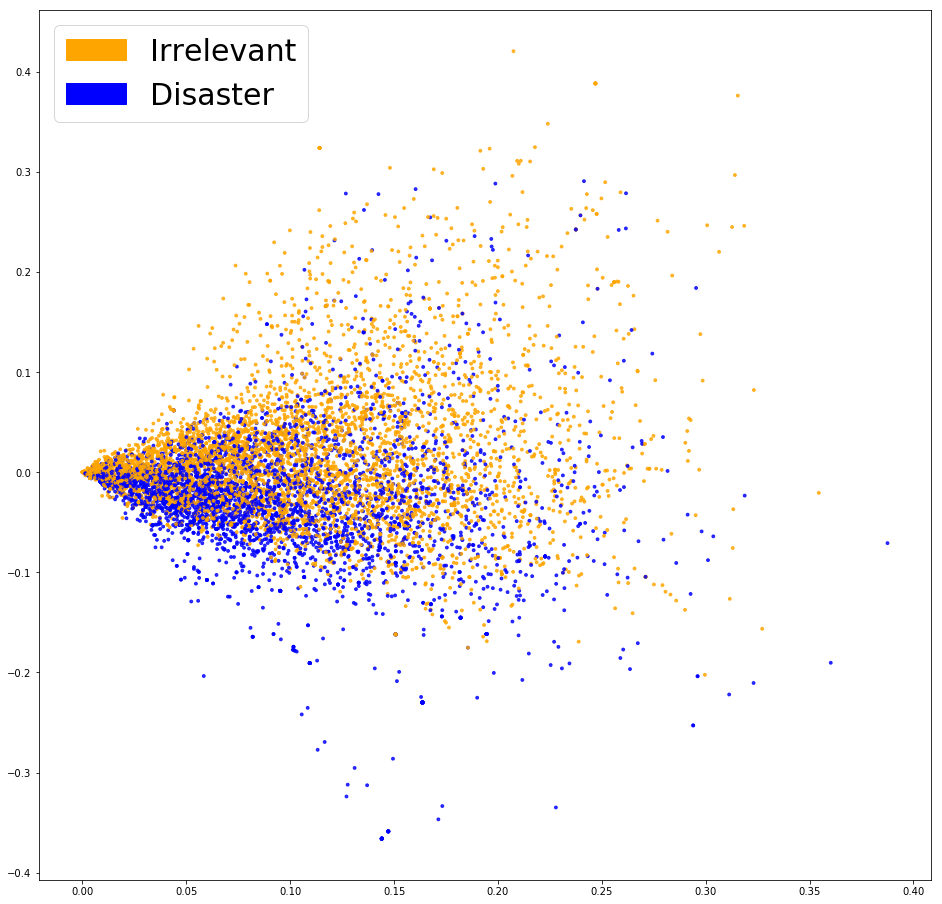

In [20]:
fig = plt.figure(figsize=(16, 16))          
plot_LSA(X_train_tfidf, y_train)
plt.show()

These embeddings look much more separated, let's see if it leads to better performance.



In [21]:
clf_tfidf = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg', 
                         multi_class='multinomial', n_jobs=-1, random_state=40)
clf_tfidf.fit(X_train_tfidf, y_train)

y_predicted_tfidf = clf_tfidf.predict(X_test_tfidf)

In [22]:
accuracy_tfidf, precision_tfidf, recall_tfidf, f1_tfidf = get_metrics(y_test, y_predicted_tfidf)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_tfidf, precision_tfidf, 
                                                                       recall_tfidf, f1_tfidf))

accuracy = 0.761, precision = 0.759, recall = 0.761, f1 = 0.760


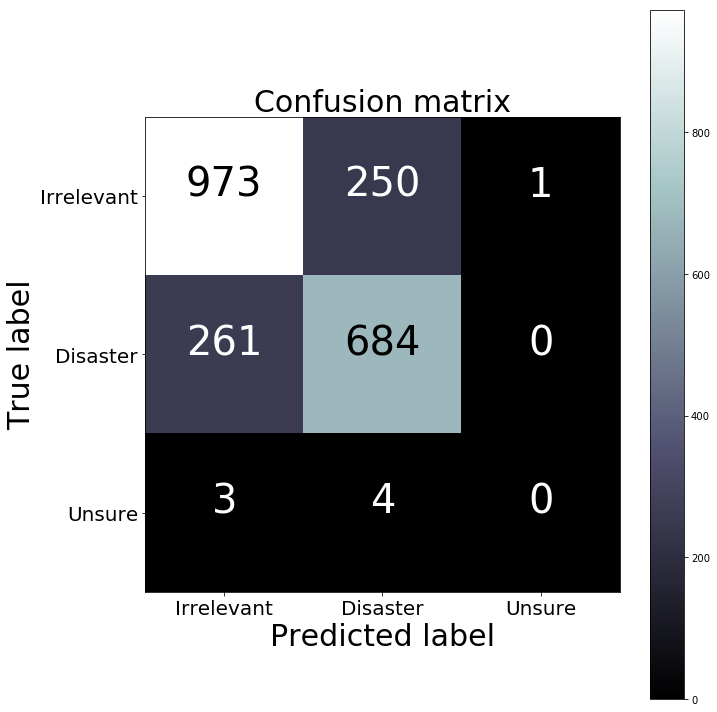

TFIDF confusion matrix
[[973 250   1]
 [261 684   0]
 [  3   4   0]]
BoW confusion matrix
[[969 252   3]
 [275 669   1]
 [  3   4   0]]


In [23]:
cm2 = confusion_matrix(y_test, y_predicted_tfidf)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm2, classes=['Irrelevant','Disaster','Unsure'], normalize=False, title='Confusion matrix')
plt.show()
print("TFIDF confusion matrix")
print(cm2)
print("BoW confusion matrix")
print(cm)

> ### Looking at important coefficients for linear regression


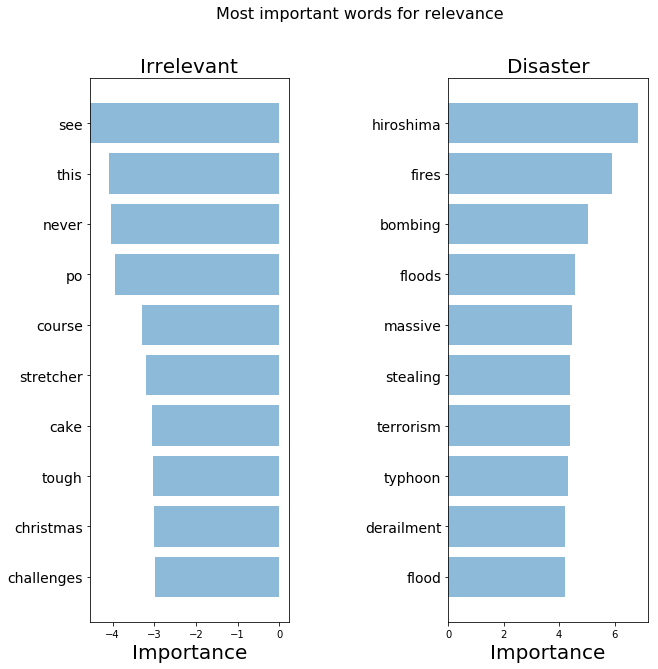

In [24]:
importance_tfidf = get_most_important_features(tfidf_vectorizer, clf_tfidf, 10)
top_scores = [a[0] for a in importance_tfidf[1]['tops']]
top_words = [a[1] for a in importance_tfidf[1]['tops']]
bottom_scores = [a[0] for a in importance_tfidf[1]['bottom']]
bottom_words = [a[1] for a in importance_tfidf[1]['bottom']]

plot_important_words(top_scores, top_words, bottom_scores, bottom_words, "Most important words for relevance")

The words it picked up look much more relevant! Although our metrics on our held out validation set haven't increased much, we have much more confidence in the terms our model is using, and thus would feel more comfortable deploying it in a system that would interact with customers.

> ### Capturing semantic meaning
Our first models have managed to pick up on high signal words. However, it is unlikely that we will have a training set containing all relevant words. To solve this problem, we need to capture the semantic meaning of words. Meaning we need to understand that words like 'good' and 'positive' are closer than apricot and 'continent'.

#### Enter word2vec
Word2vec is a model that was pre-trained on a very large corpus, and provides embeddings that map words that are similar close to each other. A quick way to get a sentence embedding for our classifier, is to average word2vec scores of all words in our sentence.


In [26]:

import gensim

word2vec_path = "GoogleNews-vectors-negative300.bin.gz"
word2vec = gensim.models.KeyedVectors.load_word2vec_format(word2vec_path, binary=True)

In [27]:
def get_average_word2vec(tokens_list, vector, generate_missing=False, k=300):
    if len(tokens_list)<1:
        return np.zeros(k)
    if generate_missing:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]
    else:
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
    length = len(vectorized)
    summed = np.sum(vectorized, axis=0)
    averaged = np.divide(summed, length)
    return averaged

def get_word2vec_embeddings(vectors, clean_questions, generate_missing=False):
    embeddings = clean_questions['tokens'].apply(lambda x: get_average_word2vec(x, vectors, 
                                                                                generate_missing=generate_missing))
    return list(embeddings)

In [28]:

embeddings = get_word2vec_embeddings(word2vec, clean_questions)
X_train_word2vec, X_test_word2vec, y_train_word2vec, y_test_word2vec = train_test_split(embeddings, list_labels, 
                                                                                        test_size=0.2, random_state=40)

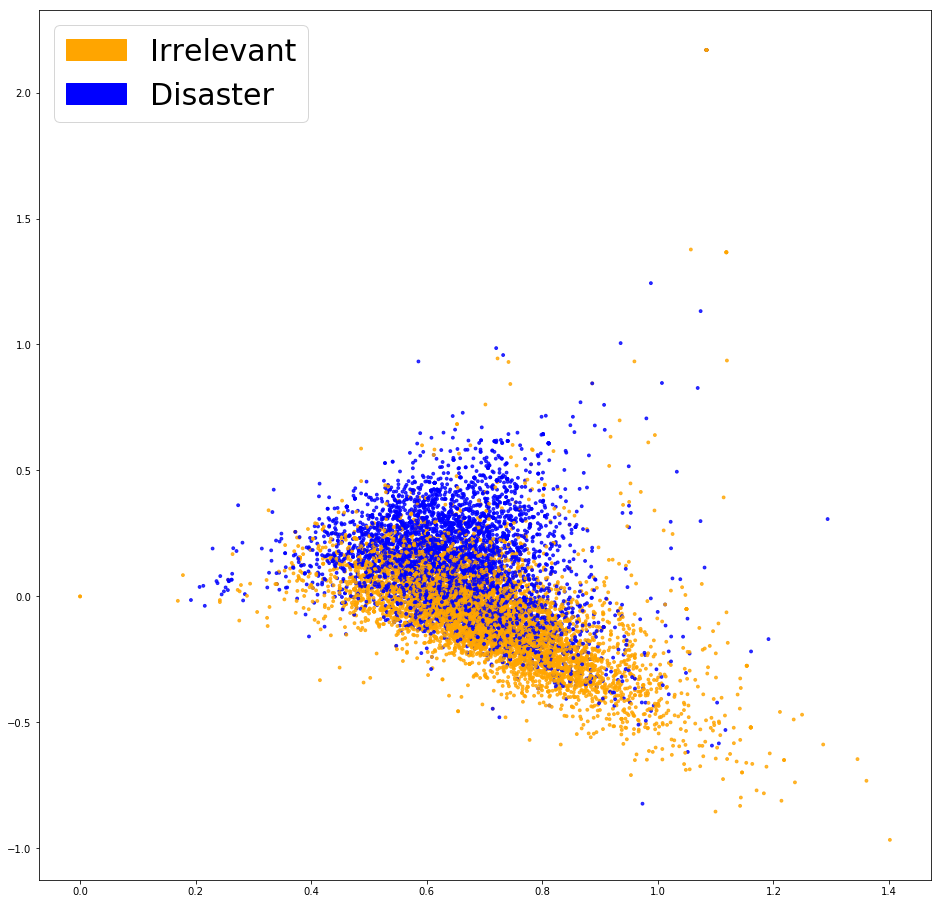

In [30]:
fig = plt.figure(figsize=(16, 16))          
plot_LSA(embeddings, list_labels)
plt.show()

In [31]:
clf_w2v = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg', 
                         multi_class='multinomial', random_state=40)
clf_w2v.fit(X_train_word2vec, y_train_word2vec)
y_predicted_word2vec = clf_w2v.predict(X_test_word2vec)

In [32]:
accuracy_word2vec, precision_word2vec, recall_word2vec, f1_word2vec = get_metrics(y_test_word2vec, y_predicted_word2vec)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_word2vec, precision_word2vec, 
                                                                       recall_word2vec, f1_word2vec))

accuracy = 0.778, precision = 0.777, recall = 0.778, f1 = 0.777


Still getting better, let's plot the confusion matrix



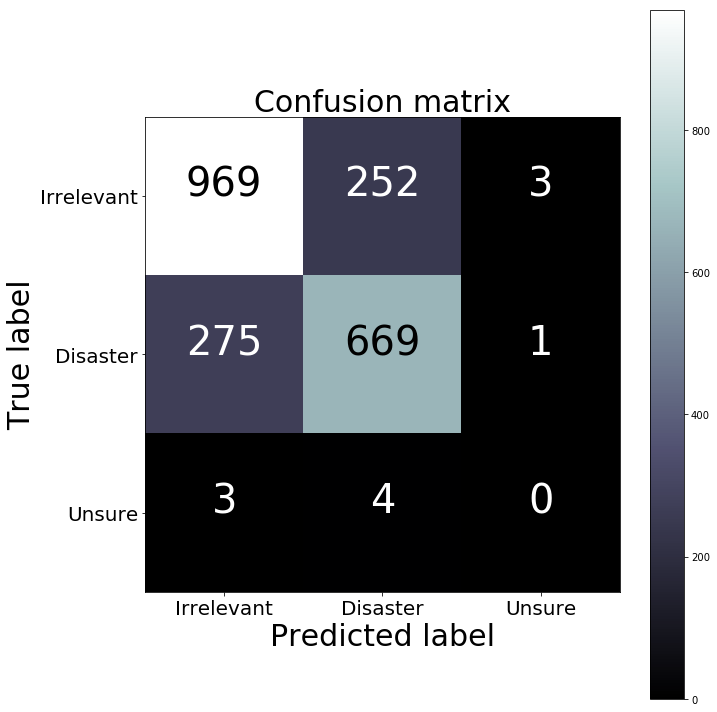

Word2Vec confusion matrix
[[981 241   2]
 [232 711   2]
 [  2   5   0]]
TFIDF confusion matrix
[[973 250   1]
 [261 684   0]
 [  3   4   0]]
BoW confusion matrix
[[969 252   3]
 [275 669   1]
 [  3   4   0]]


In [33]:
cm_w2v = confusion_matrix(y_test_word2vec, y_predicted_word2vec)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['Irrelevant','Disaster','Unsure'], normalize=False, title='Confusion matrix')
plt.show()
print("Word2Vec confusion matrix")
print(cm_w2v)
print("TFIDF confusion matrix")
print(cm2)
print("BoW confusion matrix")
print(cm)

> Our model is strictly better in all regards than the first two models, this is promissing!



> ### Further inspection
Since our model does not use a vector with one dimension per word, it gets much harder to directly see which words are most relevant to our classification. In order to provide some explainability, we can leverage a black box explainer such as LIME.

In [41]:
from lime import lime_text
from sklearn.pipeline import make_pipeline
from lime.lime_text import LimeTextExplainer

X_train_data, X_test_data, y_train_data, y_test_data = train_test_split(list_corpus, list_labels, test_size=0.2, 
                                                                                random_state=40)
vector_store = word2vec
def word2vec_pipeline(examples):
    global vector_store
    tokenizer = RegexpTokenizer(r'\w+')
    tokenized_list = []
    for example in examples:
        example_tokens = tokenizer.tokenize(example)
        vectorized_example = get_average_word2vec(example_tokens, vector_store, generate_missing=False, k=300)
        tokenized_list.append(vectorized_example)
    return clf_w2v.predict_proba(tokenized_list)

c = make_pipeline(count_vectorizer, clf)

In [42]:
def explain_one_instance(instance, class_names):
    explainer = LimeTextExplainer(class_names=class_names)
    exp = explainer.explain_instance(instance, word2vec_pipeline, num_features=6)
    return exp

def visualize_one_exp(features, labels, index, class_names = ["irrelevant","relevant", "unknown"]):
    exp = explain_one_instance(features[index], class_names = class_names)
    print('Index: %d' % index)
    print('True class: %s' % class_names[labels[index]])
    exp.show_in_notebook(text=True)

In [43]:
visualize_one_exp(X_test_data, y_test_data, 65)


C:\Users\Hammad Zahid\AppData\Local\Enthought\Canopy\edm\envs\User\lib\re.py:203: FutureWarning: split() requires a non-empty pattern match.
  return _compile(pattern, flags).split(string, maxsplit)


Index: 65
True class: relevant


In [44]:
visualize_one_exp(X_test_data, y_test_data, 60)

C:\Users\Hammad Zahid\AppData\Local\Enthought\Canopy\edm\envs\User\lib\re.py:203: FutureWarning: split() requires a non-empty pattern match.
  return _compile(pattern, flags).split(string, maxsplit)


Index: 60
True class: irrelevant


In [45]:
import random
from collections import defaultdict

random.seed(40)

def get_statistical_explanation(test_set, sample_size, word2vec_pipeline, label_dict):
    sample_sentences = random.sample(test_set, sample_size)
    explainer = LimeTextExplainer()
    
    labels_to_sentences = defaultdict(list)
    contributors = defaultdict(dict)
    
    # First, find contributing words to each class
    for sentence in sample_sentences:
        probabilities = word2vec_pipeline([sentence])
        curr_label = probabilities[0].argmax()
        labels_to_sentences[curr_label].append(sentence)
        exp = explainer.explain_instance(sentence, word2vec_pipeline, num_features=6, labels=[curr_label])
        listed_explanation = exp.as_list(label=curr_label)
        
        for word,contributing_weight in listed_explanation:
            if word in contributors[curr_label]:
                contributors[curr_label][word].append(contributing_weight)
            else:
                contributors[curr_label][word] = [contributing_weight]    
    
    # average each word's contribution to a class, and sort them by impact
    average_contributions = {}
    sorted_contributions = {}
    for label,lexica in contributors.items():
        curr_label = label
        curr_lexica = lexica
        average_contributions[curr_label] = pd.Series(index=curr_lexica.keys())
        for word,scores in curr_lexica.items():
            average_contributions[curr_label].loc[word] = np.sum(np.array(scores))/sample_size
        detractors = average_contributions[curr_label].sort_values()
        supporters = average_contributions[curr_label].sort_values(ascending=False)
        sorted_contributions[label_dict[curr_label]] = {
            'detractors':detractors,
             'supporters': supporters
        }
    return sorted_contributions

label_to_text = {
    0: 'Irrelevant',
    1: 'Relevant',
    2: 'Unsure'
}
sorted_contributions = get_statistical_explanation(X_test_data, 100, word2vec_pipeline, label_to_text)

C:\Users\Hammad Zahid\AppData\Local\Enthought\Canopy\edm\envs\User\lib\re.py:203: FutureWarning: split() requires a non-empty pattern match.
  return _compile(pattern, flags).split(string, maxsplit)


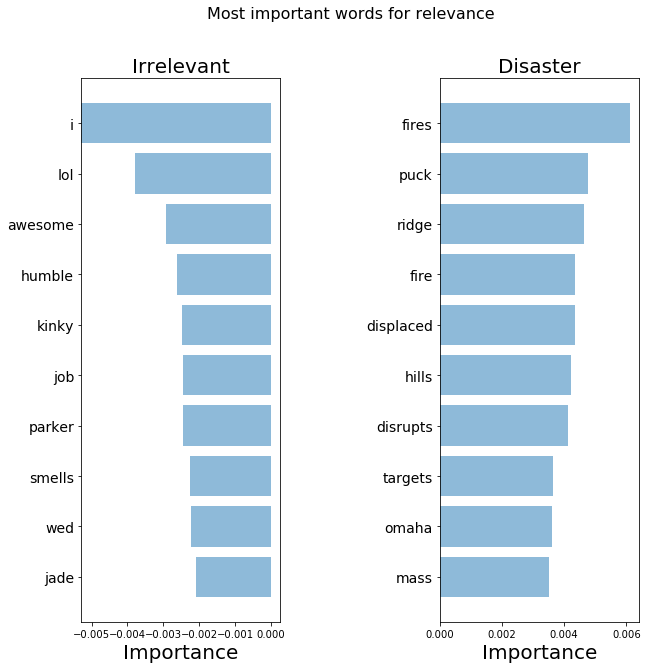

In [46]:
# First index is the class (Disaster)
# Second index is 0 for detractors, 1 for supporters
# Third is how many words we sample
top_words = sorted_contributions['Relevant']['supporters'][:10].index.tolist()
top_scores = sorted_contributions['Relevant']['supporters'][:10].tolist()
bottom_words = sorted_contributions['Relevant']['detractors'][:10].index.tolist()
bottom_scores = sorted_contributions['Relevant']['detractors'][:10].tolist()

plot_important_words(top_scores, top_words, bottom_scores, bottom_words, "Most important words for relevance")

> Looks like very relevant words are picked up! This model definitely seems to make decisions in a very understandable way.



> ### Leveraging text structure
Our models have been performing better, but they completely ignore the structure. To see whether capturing some more sense of structure would help, we will try a final, more complex model.


### CNNs for text classification
Here, we will be using a Convolutional Neural Network for sentence classification. While not as popular as RNNs, they have been proven to get competitive results (sometimes beating the best models), and are very fast to train, making them a perfect choice for this tutorial.

First, let's embed our text!

In [47]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

EMBEDDING_DIM = 300
MAX_SEQUENCE_LENGTH = 35
VOCAB_SIZE = len(VOCAB)

VALIDATION_SPLIT=.2
tokenizer = Tokenizer(num_words=VOCAB_SIZE)
tokenizer.fit_on_texts(clean_questions["text"].tolist())
sequences = tokenizer.texts_to_sequences(clean_questions["text"].tolist())

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

cnn_data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
labels = to_categorical(np.asarray(clean_questions["class_label"]))

indices = np.arange(cnn_data.shape[0])
np.random.shuffle(indices)
cnn_data = cnn_data[indices]
labels = labels[indices]
num_validation_samples = int(VALIDATION_SPLIT * cnn_data.shape[0])

embedding_weights = np.zeros((len(word_index)+1, EMBEDDING_DIM))
for word,index in word_index.items():
    embedding_weights[index,:] = word2vec[word] if word in word2vec else np.random.rand(EMBEDDING_DIM)
print(embedding_weights.shape)

Found 19076 unique tokens.
(19077, 300)


> Now, we will define a simple Convolutional Neural Network



In [48]:
from keras.layers import Dense, Input, Flatten, Dropout, Merge
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.layers import LSTM, Bidirectional
from keras.models import Model

def ConvNet(embeddings, max_sequence_length, num_words, embedding_dim, labels_index, trainable=False, extra_conv=True):
    
    embedding_layer = Embedding(num_words,
                            embedding_dim,
                            weights=[embeddings],
                            input_length=max_sequence_length,
                            trainable=trainable)

    sequence_input = Input(shape=(max_sequence_length,), dtype='int32')
    embedded_sequences = embedding_layer(sequence_input)

    # Yoon Kim model (https://arxiv.org/abs/1408.5882)
    convs = []
    filter_sizes = [3,4,5]

    for filter_size in filter_sizes:
        l_conv = Conv1D(filters=128, kernel_size=filter_size, activation='relu')(embedded_sequences)
        l_pool = MaxPooling1D(pool_size=3)(l_conv)
        convs.append(l_pool)

    l_merge = Merge(mode='concat', concat_axis=1)(convs)

    # add a 1D convnet with global maxpooling, instead of Yoon Kim model
    conv = Conv1D(filters=128, kernel_size=3, activation='relu')(embedded_sequences)
    pool = MaxPooling1D(pool_size=3)(conv)

    if extra_conv==True:
        x = Dropout(0.5)(l_merge)  
    else:
        # Original Yoon Kim model
        x = Dropout(0.5)(pool)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    #x = Dropout(0.5)(x)

    preds = Dense(labels_index, activation='softmax')(x)

    model = Model(sequence_input, preds)
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['acc'])

    return model

> Now let's train our Neural Network



In [49]:
x_train = cnn_data[:-num_validation_samples]
y_train = labels[:-num_validation_samples]
x_val = cnn_data[-num_validation_samples:]
y_val = labels[-num_validation_samples:]

model = ConvNet(embedding_weights, MAX_SEQUENCE_LENGTH, len(word_index)+1, EMBEDDING_DIM, 
                len(list(clean_questions["class_label"].unique())), False)

Instructions for updating:
`NHWC` for data_format is deprecated, use `NWC` instead


C:\Users\Hammad Zahid\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:26: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.


In [50]:
model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=3, batch_size=128)


Train on 8701 samples, validate on 2175 samples
Epoch 1/3
8701/8701 [==============================] - 22s 3ms/step - loss: 0.6002 - acc: 0.7013 - val_loss: 0.4884 - val_acc: 0.7931


> ## Takeaways
We now have a solid framework for organizing text data, and training classifiers while efficiently inspecting their results. While we've started to get some interesting results for text generation, we are far from having solved NLP!